In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib


In [2]:
fto = '/storage/stations/LS/vezicka/'


/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_01
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_06
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_02
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_08
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_05
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_09
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_01
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_06
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_02
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_08
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_05
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_07
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_00
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-0

(-2.0, 2.0)

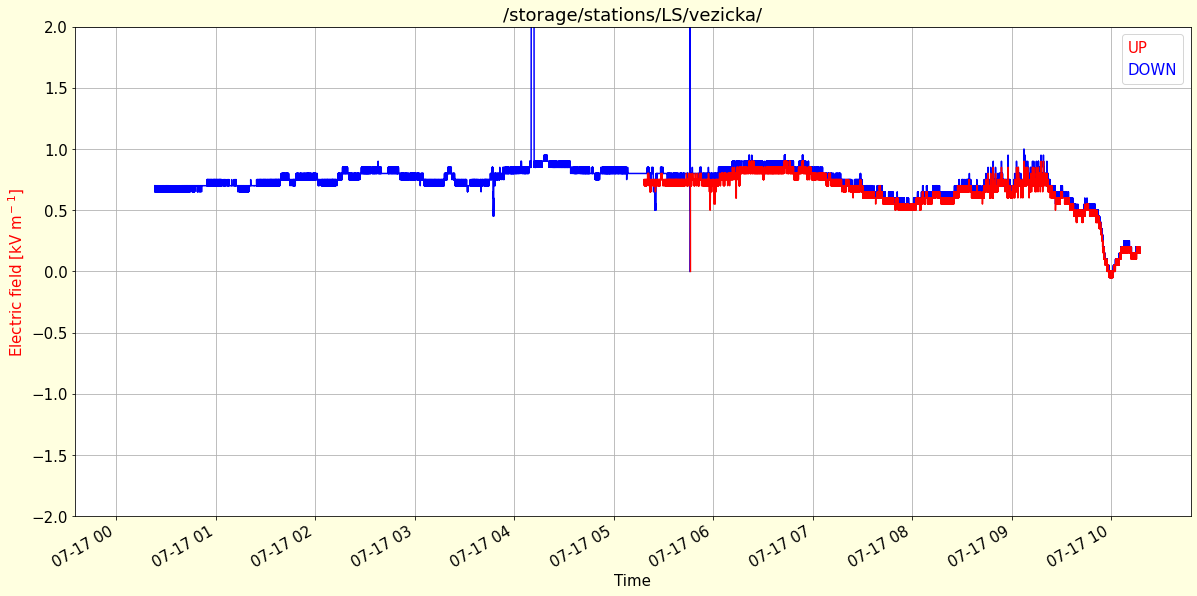

In [6]:
ftt = glob.iglob(fto+"/**/efm*.csv.2023-07-17*") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 5
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 5
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
plt.ylim(-2,2)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')

In [3]:
fto = '/storage/stations/LS/vezicka/'


/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_07
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_19
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_21
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_00
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_09
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_22
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_20
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_01
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_06
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_02
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_08
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_23
/storage/stations/LS/vezicka/thundermill1/thundermi

(-5.0, 5.0)

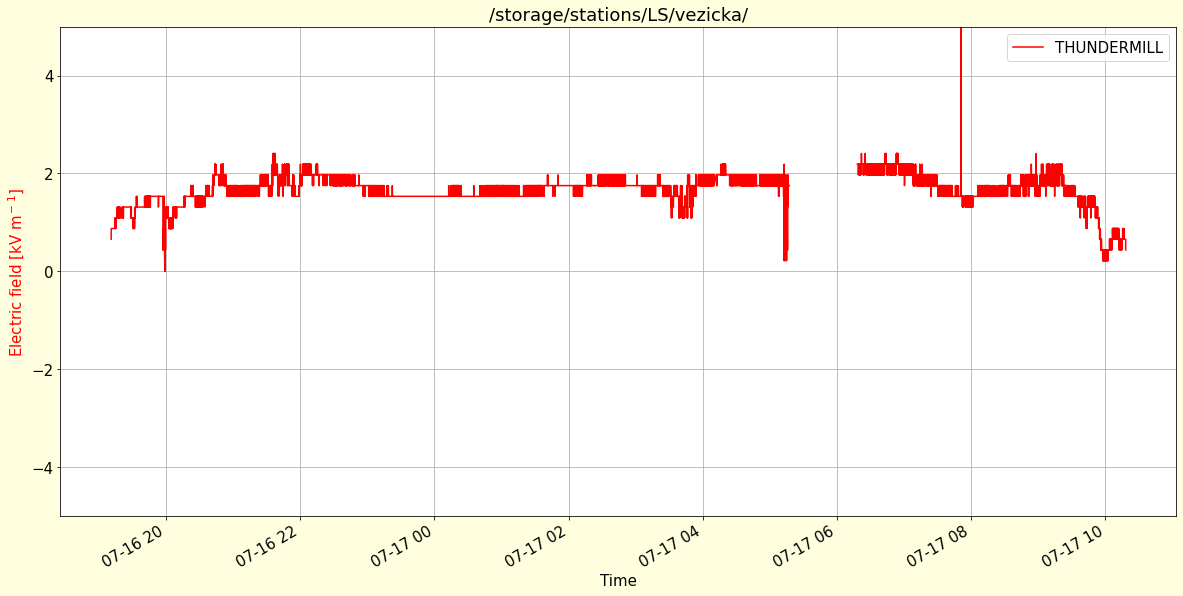

In [11]:
ftt = glob.iglob(fto+"/**/thundermill1.csv.2023-07-*") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'red'
    factor = 0.219 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    ((df['field']-128)*factor).plot(label=label, color=color)
    #(df['field1']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
plt.ylim(-5,5)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')

/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-17_10
/storage/stations/LS/vezicka/efm_up/efm_up.csv.2023-07-17_10
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_10
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_11


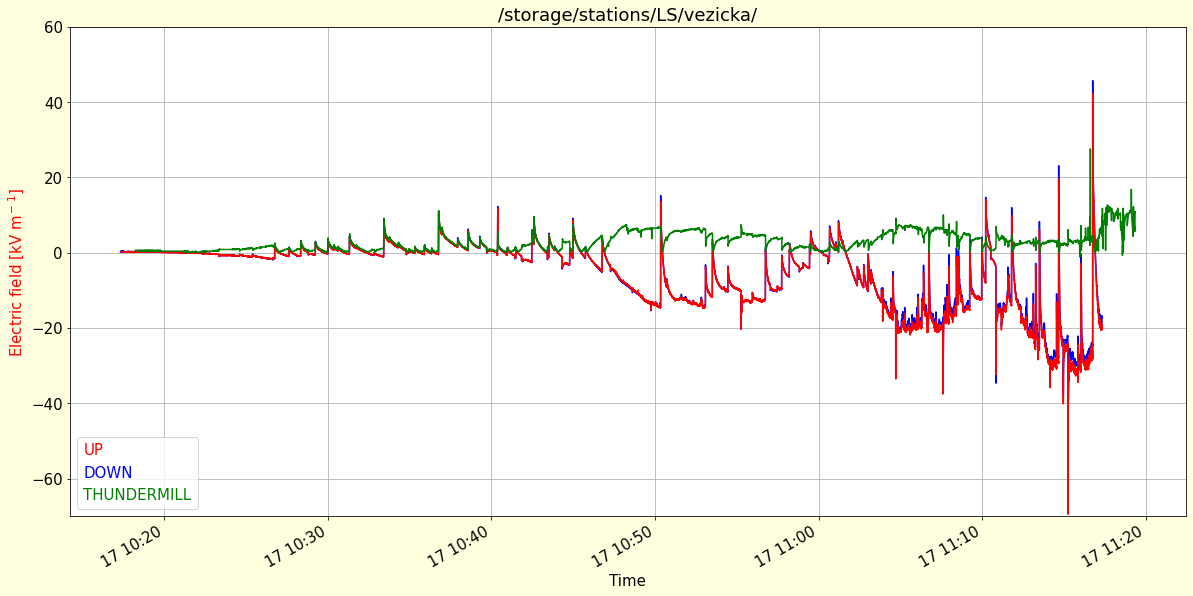

In [31]:
ftt = glob.iglob(fto+"/**/efm*.csv.2023-07-17_1*") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

ftt = glob.iglob(fto+"/**/thundermill1.csv.2023-07-17_1*") # generator, search immediate subdirectories 

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.219 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    ((df['field']-128)*factor).plot(label=label, color=color)
    #((df['field1']-128)*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
plt.ylim(-70,60)

plt.legend(['UP','DOWN', 'THUNDERMILL'], loc=3,labelcolor=['red','blue', 'green'], handlelength=0, handletextpad=0, fancybox=True) 



/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_10
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_11


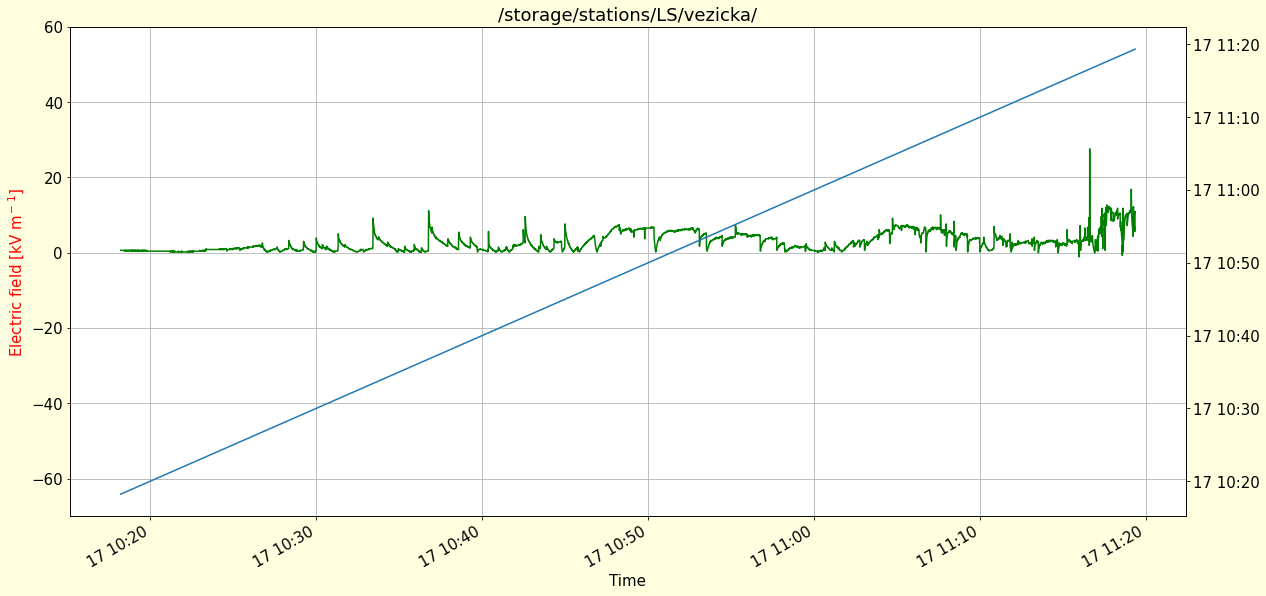

In [43]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


ftt = glob.iglob(fto+"/**/thundermill1.csv.2023-07-17_1*") # generator, search immediate subdirectories 

label = 'THUNDERMILL'
color = 'green'
factor = 0.219 # kV/m 

df = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    rdf = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    
    rdf['field'] = rdf.iloc[:,1:].max(axis=1)
    rdf['field1'] = rdf.iloc[:,1:].min(axis=1)
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    rdf['field'] = pd.to_numeric(rdf['field'])
    
    df = pd.concat([df, rdf])
    #((df['field1']-128)*factor).plot(label=label, color=color)

((df['field']-128)*factor).plot(label=label, color=color)
plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
plt.ylim(-70,60)

plt.twinx()

plt.plot(df['time'])

    

In [38]:
df

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,field,field1,time
time,,,,,,,,,,,,,,,,,,,,,
2023-07-17 10:18:13.420000000,1.689589e+09,129,130,129,129,130,129,129,131,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,126.0,2023-07-17 10:18:13.420000000
2023-07-17 10:18:14.009999872,1.689589e+09,129,130,129,130,130,129,128,129,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,126.0,2023-07-17 10:18:14.009999872
2023-07-17 10:18:14.600000000,1.689589e+09,131,130,129,130,130,130,128,129,130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,126.0,2023-07-17 10:18:14.600000000
2023-07-17 10:18:15.190000128,1.689589e+09,130,130,130,129,130,129,129,128,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,126.0,2023-07-17 10:18:15.190000128
2023-07-17 10:18:15.789999872,1.689589e+09,129,130,130,129,130,129,129,130,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,126.0,2023-07-17 10:18:15.789999872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17 11:19:19.420000000,1.689593e+09,141,141,141,143,143,144,144,146,147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0,95.0,2023-07-17 11:19:19.420000000
2023-07-17 11:19:20.000000000,1.689593e+09,139,140,140,142,141,143,143,143,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,98.0,2023-07-17 11:19:20.000000000
2023-07-17 11:19:20.589999872,1.689593e+09,136,139,139,139,142,141,143,142,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,101.0,2023-07-17 11:19:20.589999872
